# Part II Computing Project: Surveying using stars 
![test](https://www.chara.gsu.edu/files/images/chara_overview_figure.png) 

The Centre for High Angular Resolution Astronomy (CHARA) array is an optical inteferometer located one Mount Wilson in California. 

It consists of six telescopes that can be linked together, arranged in a Y shape with the distance between any two telescopes being unique. The setup is used to improve angular resolutions.

### Physical theory

#### Optical inteferometry

The angular resolution of a telescope is the smallest angle between objects that can be seen to be seperate (the smaller the better). $\text{angular resolution} \propto 1/D$ where $D$ is the diameter of the telescope. Therefore, larger telescopes are favoured as they are better at resolving two objects. If you know how far away an object is and how large the features you are trying to observe are you can find the required diameter of the telescope. Often, the required diameter is far too large both practically and economically, this is where telescope arrays become useful. 

When using two telescopes together, the angular resolution is set by the distance between the telescopes and not the sizes of the individual telescopes. This means two telescopes that are distance $D$ apart have the same resolving capability (but not light collecting capability) as a larger continuous telescope of diameter $D$. 

**When using light from a single source such as a star, the light must have travelled an equal distance in each branch to interfere. HOW TO EXPLAIN? **

#### Interferometry setup at CHARA


![Image of Token](https://www.chara.gsu.edu/files/Tutorials/interferometer_basic.png) 


At CHARA, there are six telescopes of diameter 1m which can be pointed to different part of the sky. The light from these is sent down vacuum tubes to the central Beam Synthesis Facility. The path difference in the two beams has two contributing factors: 

**External delay** - Generally, the light from a star will arrive at one telescope before the other, as shown in figure X. This introduces a delay that is related to the inner product of the star vector and the baseline vector (the vector joining two telescopes). $\hat{\pmb{S}} \cdot \pmb{B}$ where $\pmb{B} = \pmb{r}_1 - \pmb{r}_2$.

**Internal delay** - The internal delay has three factors. a) the differing distance to the central beam synthesis facility, this is known as the "constant term" b) a mirror on a cart which is computer-controlled and can move with submicron accuracy c) a set of fixed mirrors that add in fixed delays of varying length called "Pipes of Pans" (POP) delays. 

This gives the overall equation

$$\hat{\pmb{S}} \cdot (\pmb{r}_1 - \pmb{r}_2) + d_1 - d_2 $$

Which is equal to zero when the paths are of equal distance. When this is true, it is possible to split up the d term and present as below

$$\text{CART}_1 - \text{CART}_2 = \hat{\pmb{S}} \cdot (\pmb{r}_1 - \pmb{r}_2) + \text{POP}_1 - \text{POP}_2$$

### Mathematical theory
- How if we have a series of measurements and have an equation for each then we have a system of linear equations. This can be put into a matrix form where we are trying to find the model parameter, these are the vectors from some argbitrary origin which we can set as E1 and the pop settings
- We have many more equations than unknowns meaning the problem is over determined, explain this with the graph example 
- Explain how we cannot have exact solution but we can give least squares in parameter space
- Why don't we use something else instead of least squares? 
    - Happens to be the highest likelihood 
    - also gives linear derivative to solve which is nice 
    - why do outliers make such a big difference 
- Maybe give least absolute value a go!
- Show the derivation that arrives at the pseudo inverse being the least squares
- Pseudoinverse is the least squares problem to A^TA
- How does the SVD fit into all of this???



### How to implement with the dataset given 

For this task, we are given 5 sets of data. Each consists of a series of measurements (rows), at which the path difference has been equalised. Below is an example measurement.


|    | utc                     | star   |   azimuth |   elevation | tel_1   | tel_2   | pop_1   | pop_2   |   cart_1 |   cart_2 |
|---:|:------------------------|:-------|----------:|------------:|:--------|:--------|:--------|:--------|---------:|---------:|
|  0 | 2019-04-07T03:18:25.000 | #93396 |   4.93762 |     1.27939 | W1      | W2      | P3B3    | P5B2    |  62.5857 |       80.0000 |

From the previous section, it is known that each measurement corresponds to the equation 

$$\text{CART}_1 - \text{CART}_2 = \hat{\pmb{S}} \cdot (\pmb{r}_1 - \pmb{r}_2) + \text{POP}_1 - \text{POP}_2$$

If each measurement is converted into an equation we can form a matrix equation, as seen below. From here, common data science techniques may be used.

$$\pmb{y} = \pmb{X} \pmb{\beta}$$

Converting the measurments into a system of equations and then into a matrix equation is known as *pre-processing*. For the conversion of a row into an equation there are the following steps:

1. Conversion of star direction unit vector, $\hat{\pmb{S}}$, from horizontal (azimuth, elevation) to Cartesian coordinates

2. Find a way of representing the projection of the baseline onto the star vector

3. Find a way of representing which POP setting is being used

4. Get the output vector, $\pmb{y}$, as the difference between the carts

Lets go through these in order...

**1.** the horizontal coordinates are related to Cartesians coordinates via the following equations 

<!-- 
![<img src="image.png" width="250"/>](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Azimuth-Altitude_schematic.svg/1200px-Azimuth-Altitude_schematic.svg.png) -->

$$r = (x,y,z) = (\cos\theta \sin\phi, \cos\theta \cos\phi, \sin\theta)$$

Columns of a DataFrame are vectorised, meaning the equation can be carried out on every line without any `for` loops

Note, the transpose of the equation is taken, with `.T`, as originally there are three (2034,) vectors next to each other making the shape (3, 2034). Taking the transpose gets (2034,3) vector which is an array of 2034 3-vectors which is exactly what is wanted.

**2.** we can represent the the telescope using *one-hot encoding*.

In short, as we have categorical data, that cannot be assigned numerical values relative to each other (why). Therefore assigning a column for each unique model parameter is appropriate, as discussed above.

In the case of the telescope this is a column for each of the three $(x,y,z)$ components. Although, we need 15 and not 18 of these columns as one telescopes is the origin (only the relative positions of telescopes can be found). 

Looking back at the equation which is to be constructed for each measurement, we see that both telescopes are dotted with the star unit vector and the second telescope (`tel_2`) is a negative. 

$$\hat{\pmb{S}} \cdot (\pmb{r}_{1} - \pmb{r}_{2}) = S_x (r_{1,x} - r_{2,x}) + S_y (r_{1,y} - r_{2,y}) + S_z (r_{1,z} - r_{2,z})$$

This means that every telescope that is present must be dotted with the star unit vector and that the second telescope must have a factor of $-1$.

**3.** for the POP settings there are 30 different settings, $PXBY$ with $1 \leq X \leq 5$ and  $1 \leq Y \leq 6$. But, each setting is unique when used with each telescope. For example, $P1B3$ adds in a different amount of path length when used with $W1$ or $S2$. 

To create a general design matrix, each setting was allowed on each telescope i.e. 180 columns. Although this can be reduced massive if the dataset if first checked to see which POP settings each telescope uses and adjusting the number of columns accordingly. Though, compute was not not a limiting factor so this was left out.

**4.** Finding the model output vector (i.e. the differnce between the two moveable carts) is trivial and especially simple due to the vectorisation of columns of DataFrames.

We can create a function that for data with some telescopes and POP settings will create a design matrix of the appropriate size and populate it 


### SVD and pseudoinverse

After having formed the matrix equation $y = X \beta$, it is time to consider the problem at hand.

- Problem is overdetermined


### Data processing

The elevation and the azimuth columns are the wrong way around for the four 2019 datasets. Also, it is nice to convert degrees to radians as this is the standard angle units for trigonometry in numpy.

``` python

df = pd.read_csv(
    "data/2019_04_07.csv"
) 

# correct the columns for 2019 datasets
df = df.rename(columns={"elevation": "azimuth", "azimuth": "elevation"})

# change to radians
df["azimuth"] = df["azimuth"] * 2 * np.pi / 360
df["elevation"] = df["elevation"] * 2 * np.pi / 360

df.to_csv('data/2019_04_07.csv')

```

### Tasks


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("data/2019_04_07.csv")

df.head()

,utc,star,azimuth,elevation,tel_1,tel_2,pop_1,pop_2,cart_1,cart_2,year,month,day
0,2019-04-07T03:18:25.000,#93396,4.937621,1.279389,W1,W2,P3B3,P5B2,62.585687,80.000000,2019,4,7
1,2019-04-07T03:18:25.000,#93396,4.937621,1.279389,S2,W1,P2B4,P3B3,39.085558,62.585687,2019,4,7
2,2019-04-07T03:18:29.000,#93396,4.937605,1.279153,W1,W2,P3B3,P5B2,62.610570,80.000000,2019,4,7
3,2019-04-07T03:18:34.000,#93396,4.937586,1.278860,W1,W2,P3B3,P5B2,62.641690,80.000000,2019,4,7
4,2019-04-07T03:32:01.000,#93396,4.937428,1.231426,S2,W1,P2B4,P3B3,43.169167,76.216268,2019,4,7


Converting the measureents into a system of equations and then into a matrix equation is known as *pre-processing*. For the conversion into equation there are the follwoing considerations:

1. Conversion of star direction unit vector, $\hat{\pmb{S}}$, from horizontal (azimuth, elevation) to Cartesian coordinates

2. Find a way of representing the projection of the baseline onto the star vector

3. Find a way of representing which POP setting is being used

4. Get the output vector, $\pmb{y}$, as the difference between the carts

Lets go through these in order...

**1.** the horizontal coordinates are related to Cartesians coordinates via the following equations 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Azimuth-Altitude_schematic.svg/1200px-Azimuth-Altitude_schematic.svg.png =200x)

$$r = (x,y,z) = (\cos\theta \sin\phi, \cos\theta \cos\phi, \sin\theta)$$

Columns of a DataFrame are vectorised, meaning the equation can be carried out on every line without any `for` loops

In [11]:
theta = df.elevation
phi = df.azimuth

S_vector = lambda theta, phi: np.array(
    [np.cos(theta) * np.sin(phi), np.cos(theta) * np.cos(phi), np.sin(theta)]
).T

S = S_vector(theta, phi)

S.shape

(2034, 3)

Note, the transpose of the equation is taken, with `.T`, as originally there are three (2034,) vectors next to each other making the shape (3, 2034). Taking the transpose gets (2034,3) vector which is an array of 2034 3-vectors which is exactly what is wanted.

**2.** we can represent the the telescope using *one-hot encoding*.

In short, as we have categorical data, that cannot be assigned numerical values relative to each other (why). Therefore assigning a column for each unique model parameter is appropriate, as discussed above.

In the case of the telescope this is a column for each of the three $(x,y,z)$ components. Although, we need 15 and not 18 of these columns as one telescopes is the origin (only the relative positions of telescopes can be found). 

Looking back at the equation which is to be constructed for each measurement, we see that both telescopes are dotted with the star unit vector and the second telescope (`tel_2`) is a negative. 

$$\hat{\pmb{S}} \cdot (\pmb{r}_{1} - \pmb{r}_{2}) = S_x (r_{1,x} - r_{2,x}) + S_y (r_{1,y} - r_{2,y}) + S_z (r_{1,z} - r_{2,z})$$

This means that every telescope that is present must be dotted with the star unit vector and that the second telescope must have a factor of $-1$.

**3.** for the POP settings there are 30 different settings, $PXBY$ with $1 \leq X \leq 5$ and  $1 \leq Y \leq 6$. But, each setting is unique when used with each telescope. For example, $P1B3$ adds in a different amount of path length when used with $W1$ or $S2$. 

To create a general design matrix, each setting was allowed on each telescope i.e. 180 columns. Although this can be reduced massive if the dataset if first checked to see which POP settings each telescope uses and adjusting the number of columns accordingly. Though, compute was not not a limiting factor so this was left out.

**4.** Finding the model output vector (i.e. the differnce between the two moveable carts) is trivial and especially simple due to the vectorisation of columns of DataFrames.

We can create a function that for data with some telescopes and POP settings will create a design matrix of the appropriate size and populate it 

### Anaylsis on a single night

In [12]:
def create_design_mat(df, tot_width=False):
    """
    Completes the preprocessing of DataFrame to create the design matrix for telescope position problem 
    
    """

    # ea. row must contain (x, y, z) for ea. telescope (except E1, the zero point)
    # and all 30 POP settings for ea. telescope
    
    telescopes = ["E1", "W2", "W1", "S2", "S1", "E2"]
    theta = df.elevation
    phi = df.azimuth
    S = S_vector(theta, phi)
    k = 0
    
    tot_unique_pops = []
    
    width = 15

    for telescope in telescopes: 

        pop_tel_1 = df[df.tel_1 == telescope].pop_1
        pop_tel_2 = df[df.tel_2 == telescope].pop_2
        tel_1_unique_pops = np.unique(pop_tel_2)
        tel_2_unique_pops = np.unique(pop_tel_1)
        tel_unique_pops = np.union1d(tel_1_unique_pops, tel_2_unique_pops)
        tot_unique_pops.append(tel_unique_pops)
        width += len(tel_unique_pops)
    
    if tot_width: width = 195
        
    design_mat = np.zeros((len(df), width))

    for i, telescope in enumerate(telescopes):

        # for ea. new telescope must jump 3 places for (x, y, z)

        if telescope != "E1":  # keep 'E1' as the zero point

            design_mat[:, 3*  i - 3: 3 + 3 * i - 3] += S * np.where(
                df["tel_1"] == telescope, 1, 0
            ).reshape(-1, 1)
            design_mat[:, 3 * i - 3: 3 + 3 * i - 3] -= S * np.where(
                df["tel_2"] == telescope, 1, 0
            ).reshape(-1, 1)

        for pop in tot_unique_pops[i]:
            
            # not working because E1 isn't in the list of telescopes
            design_mat[:, 15 + k] += np.where(
                (df["pop_1"] == pop) & (df["tel_1"] == telescope), 1, 0
            )  # add when it is tel_1
            design_mat[:, 15 + k] -= np.where(
                (df["pop_2"] == pop) & (df["tel_2"] == telescope), 1, 0
            )  # subtract when it is the tel_2
            
            k += 1 

    y = df["cart_2"].values - df["cart_1"].values

    pinv = np.linalg.pinv(design_mat)
    
    beta = pinv @ y

    return design_mat, pinv, y, beta 

In [13]:
class DesignMatrix:
    
    def __init__(self, df):
        self.df = df
        #self.telescopes = ["E1", "W2", "W1", "S2", "S1", "E2"]
        self.design_mat = self.init_design_mat(self.df)
        self.populate_design_mat(self.df)
        self.pinv = np.linalg.pinv(self.design_mat)
        self.y = self.df.cart_2 - self.df.cart_1
        self.beta = self.pinv @ self.y 
        
    
    def init_design_mat(self, df):
    
        tot_unique_pops = []

        width = 15

        for telescope in telescopes: 

            pop_tel_1 = df[df.tel_1 == telescope].pop_1
            pop_tel_2 = df[df.tel_2 == telescope].pop_2
            tel_1_unique_pops = np.unique(pop_tel_2)
            tel_2_unique_pops = np.unique(pop_tel_1)
            tel_unique_pops = np.union1d(tel_1_unique_pops, tel_2_unique_pops)
            tot_unique_pops.append(tel_unique_pops)
            width += len(tel_unique_pops)
            
        return np.zeros((len(df), width))

    def populate_design_mat(self, df):
        
        k = 0 
        
        for i, telescope in enumerate(telescopes):

        # for ea. new telescope must jump 3 places for (x, y, z)

            if telescope != "E1":  # keep 'E1' as the zero point

                self.design_mat[:, 3*  i - 3: 3 + 3 * i - 3] += S * np.where(
                    df["tel_1"] == telescope, 1, 0
                ).reshape(-1, 1)
                self.design_mat[:, 3 * i - 3: 3 + 3 * i - 3] -= S * np.where(
                    df["tel_2"] == telescope, 1, 0
                ).reshape(-1, 1)

            for pop in tot_unique_pops[i]:

                # not working because E1 isn't in the list of telescopes
                self.design_mat[:, 15 + k] += np.where(
                    (df["pop_1"] == pop) & (df["tel_1"] == telescope), 1, 0
                )  # add when it is tel_1
                self.design_mat[:, 15 + k] -= np.where(
                    (df["pop_2"] == pop) & (df["tel_2"] == telescope), 1, 0
                )  # subtract when it is the tel_2

                k += 1

        return design_mat

In [14]:

df = pd.read_csv(
    "data/2019_04_07.csv"
)  

design_mat, pinv, y, beta = create_design_mat(df)
y - design_mat @ beta

beta

array([194.43260791, 106.59897763,  -6.37520967, 300.40862676,
        89.60984578,   4.88053282, 131.08378955, 272.35384145,
        -6.54767727, 125.33690067, 305.93267805,  -5.90805154,
        54.94397029,  36.20990241,  -3.10685717, -33.69599514,
        39.42499446,  76.01261543, 109.32471943, -57.87517036,
       -93.58353866, -57.01055172, -20.47425207,  49.43084043,
       -45.1711    ,  27.98658986,  61.29638686, -50.04640328,
        23.08222719,  59.67810005,  92.98913396, -97.0195406 ,
       -60.44193973, -23.90711611])

### Error analysis

We can repeat the process for the other three nights given in 2019, finding estimates for the model parameters in each case. This helps to see if there is any evidene for the telescopes moving due to seasonal effects.

There are then two way to estimate the uncertainties for each month 
1. compare the solutions on two different nights in the same month and use the variation between the solutions to esitmate the solution uncertainty 
2. derive an uncertainty estimate using Singular Value Decomposition (SVD) of the design matrix to determine U, w and V.T matrixes using:

$$\sigma^2(\theta_j) = \sum_i \left ( \frac{V_{ji}}{w_i} \right )^2 \sigma^2_d$$


**1.** looking at the difference in the baseline values over different nights in the same month

In [15]:
# two nights in April 

df_04_07 = pd.read_csv('data/2019_04_07.csv')
df_04_08 = pd.read_csv('data/2019_04_08.csv')

design_mat_04_07, pinv_04_07, y_04_07, beta_04_07 = create_design_mat(df_04_07, tot_width=True)
design_mat_04_08, pinv_04_08, y_04_08, beta_04_08 = create_design_mat(df_04_08, tot_width=True)

error_04 = (beta_04_07 - beta_04_08)[:15]

error_04

array([ 1.07474007e-03,  1.54198054e-04, -6.34205597e-03, -7.23506990e-04,
        9.46750323e-04, -7.39589303e-03,  7.76466449e-04,  5.94120409e-04,
       -5.10380483e-03,  9.04768143e-04,  3.68108612e-04,  2.96045234e-05,
        5.50812274e-03, -8.61702611e-03,  4.23875779e-03])

In [16]:
# two nights in November

df_11_05 = pd.read_csv('data/2019_11_05.csv')
df_11_06 = pd.read_csv('data/2019_11_06.csv')

design_mat_11_05, pinv_11_05, y_11_05, beta_11_05 = create_design_mat(df_11_05, tot_width=True)
design_mat_11_06, pinv_11_06, y_11_06, beta_11_06 = create_design_mat(df_11_06, tot_width=True)

error_11 = (beta_11_05 - beta_11_06)[:15]

In [17]:
np.mean((beta_11_05 - beta_04_07)[:12])

-0.002098624582330085

We see that the error uncertainty between nights of the same month is 

In [18]:
1.590712380243532e-05

loc_actual = np.array([
    #[0,0,0], # E1
    [194.451, 106.618, - 6.318], # W2
    [300.442, 89.639, 4.954], # W1
    [131.120, 272.382, -6.508], # S2
    [125.371, 305.963, -5.865], # S1
    [54.970, 36.246, -3.077], # E2
])

loc_actual = loc_actual.reshape(-1,15)
np.max(loc_actual - (beta_04_07)[:15])
# max deviation from results was 7cm! that is a lot

0.07346718478015823

No measurements were taken with the E2 telescope on the two November nights for which the data was given, so we cannot predict its baseline

**2.** Now using the formula to work out via SVD 

(why are we allowed to remove singular values)

where 𝜎𝑑 is the RMS error on the delay measurements, assumed to be the same for all measurements in a given fit. Remember to check for particularly small values of the singular values 𝑤𝑖corresponding to degeneracies, and replace 1/𝑤𝑖 with zero in these cases. Small is usually defined as around 𝑁 𝜖 times the maximum singular value where 𝑁 is the number of data poinand 𝜖 is the machine precision.You can estimate 𝜎𝑑 from the residuals in your data, assuming that 𝜒2 of the best‑fit model approximately equal to the number of degrees of freedom

For error propagation we have:

$$B^2 = B_x^2 + B_y^2 + B_z^2 $$
 
Therefore, $\frac{\Delta B^2}{B^2} = \frac{\Delta B_x^2}{B_x^2} + \frac{\Delta B_y^2}{B_y^2} + \frac{\Delta B_z^2}{B_z^2}$ and for $\frac{\Delta A^2}{A^2} = 2\frac{\Delta A}{A}$. Therefore:

$$\frac{\Delta B}{B} = \frac{\Delta B_x}{B_x} + \frac{\Delta B_y}{B_y} + \frac{\Delta B_z}{B_z} $$

In [19]:
# the delay measurements (y) have an rms error given by the model 
sigma_d = np.sqrt(np.sum( (y_04_07 - design_mat_04_07 @ (beta_04_07))**2 )/len(df_04_07))

sigma_d

0.0001553947214183591

In [20]:
U, w, Vt = np.linalg.svd(design_mat_04_07)

In [21]:
eps = np.finfo(type(w[0])).eps
N = len(df)

# w is given as a vector in ascending order
small = w[0] * N * eps
small

1.984114107562424e-11

In [22]:
type(w[0])

numpy.float64

In [23]:
w = w[w > small]

In [24]:
# we are summing over the columns therefore need to truncate V slightly 

Vt = Vt[:, :len(w)]
Vt.shape

(195, 33)

In [25]:
sigma = np.sqrt(np.sum((Vt/w)**2, axis=1) * sigma_d**2)

sigma[:10]

array([1.21816468e-04, 5.88525019e-05, 1.90872704e-04, 2.88510557e-04,
       2.52565802e-04, 2.78769979e-04, 3.08752832e-04, 1.87223130e-03,
       5.36431260e-04, 1.65169724e-03])

In [26]:
def svd_uncertainty(df, design_mat, y, beta):
    
    residuals = y - design_mat @ (beta)
    
    sigma_d = np.sqrt(np.sum( residuals**2 )/ len(df))
    
    U, w, Vt = np.linalg.svd(design_mat)
    
    eps = np.finfo(type(w[0])).eps
    N = len(df)

    # w is given as a vector in ascending order
    small = w[0] * N * eps
    w = w[w > small]
    
    # remove eigenvetors orresponding to the small singular values
    Vt = Vt[:, :len(w)]
    Vt.shape
    
    sigma = np.sqrt(np.sum((Vt/w)**2, axis=1) * sigma_d**2)
    
    return sigma   

Now must add error bars to the measurements that have been taken for the 15 baselines between the telescopes in April vs November. 

In [27]:
# i.e. lets see what the errors for W1 to W2 these are the 2nd and 1st baseline vetors 
# we have the errors for each model parameter which must be added in quadrature

beta_04_07[:3]
sigma_04_07 = svd_uncertainty(df_04_07, design_mat_04_07, y_04_07, beta_04_07)

beta_04_08[:3]
sigma_04_08 = svd_uncertainty(df_04_08, design_mat_04_08, y_04_08, beta_04_08)

beta_11_05[:3]
sigma_11_05 = svd_uncertainty(df_11_05, design_mat_11_05, y_11_05, beta_11_05)

beta_11_06[:3]
sigma_11_06 = svd_uncertainty(df_11_06, design_mat_11_06, y_11_06, beta_11_06)

(89.6, 89.61)

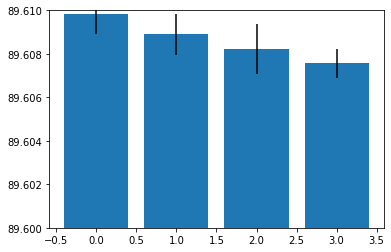

In [28]:
#errors = np.array([sigma_04_07[0],sigma_04_08[0],sigma_11_05[0],sigma_11_06[0]])
value = 4

errors = np.array([error_04[value], error_04[value], error_11[0], error_11[value]])


plt.bar([0,1,2,3], [beta_04_07[value],beta_04_08[value],beta_11_05[value],beta_11_06[value]], yerr=errors)
plt.ylim(89.6,89.610)

In [29]:
beta_04_07[5] - beta_11_05[5]
# 0.5mm, 1.6mm, 0.4mm

0.0004983319578766299

In [30]:
sigma_04_07[:15] * 226

array([0.02753052, 0.01330067, 0.04313723, 0.06520339, 0.05707987,
       0.06300202, 0.06977814, 0.42312427, 0.12123346, 0.37328358,
       0.42336911, 0.47118295, 0.10409213, 0.43360731, 1.09483252])

In [31]:
sigma_11_05[:15] 

array([1.27448340e-05, 2.28583070e-05, 3.20448415e-05, 4.25731626e-05,
       3.31646782e-05, 2.53079216e-05, 1.39571145e-05, 2.38703913e-05,
       2.47689162e-05, 2.74340804e-05, 1.21450230e-05, 1.47944618e-05,
       4.19223561e-05, 1.61253495e-05, 1.07451347e-05])

#### Pseudoinverse as minimisation of the 2-norm 

$y= Xb$ only has solutions for square matrices. Though we can minimise wrt 2-norm 

$$min || A\hat{b} - y || _2$$

$$r(\hat{b}) = || A\hat{b} - y ||_2 ^2 = (A\hat{b} - y)^T(A\hat{b} -y)$$

$$ = \hat{b}^TA^TA\hat{b} - \hat{b}^TA^Ty - y^TA\hat{b} +y^Ty $$

$$\frac{dr(\hat{b}+\epsilon v)}{d\epsilon} = \frac{d((\hat{b}+\epsilon v)^TA^TA(\hat{b}+\epsilon v) - (\hat{b}+\epsilon v)^T A^T y - y^TA(\hat{b} + \epsilon v) +y^Ty)}{d\epsilon} $$

$$ = \hat{b}A^TAv + v^TA^TA\hat{b}- v^T A^T y - y^TAv$$

$$ = v^T (\hat{b}A^TAv - A^T y) + (v^T(A^TA\hat{b} - A^Ty ))^T$$

Therefore we see that the solution to the least squares problem is 

$$ A^T A \hat{b} = A^T y $$

So the pseudoinverse (the matrix that best doesn the job of an inverse is)

$$ \hat{b} = (A^T A)^{-1} A^T y = A^+ y$$

The pseudoinverse is also unique as it is... 

\begin{equation}
    A^+ = (A^*A)^{-1}A^* \\
    =(V\Sigma U^*U\Sigma V^*)^{-1} V\Sigma U^* \\
    =(V\Sigma^2 V^*)^{-1} V\Sigma U^* \\
    =(V^*)^{-1} \Sigma^{-2} V^{-1} V\Sigma U^* \\
    = V \Sigma^{-2}\Sigma U^* \\
    = V\Sigma^{-1}U^*
\end{equation}


#### Visualisation of overdetermined 
- give examples of 3 equations and 2 unknowns
- Show how the pseudoinverse gives leastsquares
- explain the usual way as minimising squares in output space 
- but this is showing least squares in parameter space 
- also maybe talk about linear regression generally and explain how we have intercept without the one that is usually seen 

In [32]:
design_mat_04_07[0,12]

0.0

In [33]:
import sys 

# the very largest of tens of mb 
sys.getsizeof(design_mat_04_07)

3173160

In [34]:
sys.getsizeof(design_mat_04_08)

4182480

In [35]:
%timeit (np.linalg.pinv(design_mat_04_07))
%timeit (np.linalg.pinv(design_mat_04_08))

design_mat_04_08.shape

25.5 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
30.3 ms ± 590 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


(2681, 195)

In [36]:
df_2012 = pd.read_csv('data/2012_all_v2.csv')

design_mat_2012, pinv_2012, y_2012, beta_2012 = create_design_mat(df_2012)

%timeit (np.linalg.pinv(design_mat_2012))

601 ms ± 89.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%timeit create_design_mat(df_2012)

1.48 s ± 68.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
design_mat_2012.shape

(22275, 121)

In [39]:
sys.getsizeof(design_mat_2012)

21562320

In [40]:
len(np.where(design_mat_2012 != 0)[0])

148380

In [41]:
len(design_mat_2012)/365

61.02739726027397

In [42]:
# sparsity of ~10% which doesn't warrant the use of any other method of representation
design_mat_11_05, pinv_11_05, y_11_05, beta_11_05 = create_design_mat(df_11_05)
U, w, Vt = np.linalg.svd(design_mat_11_05)

In [43]:
w

array([5.98017407e+01, 4.82704786e+01, 4.57188475e+01, 3.78453781e+01,
       3.47532573e+01, 3.21908971e+01, 3.04416848e+01, 2.92208704e+01,
       2.55905923e+01, 2.49385946e+01, 2.29099768e+01, 2.18421469e+01,
       2.04405677e+01, 2.01673314e+01, 1.96046603e+01, 1.86828861e+01,
       1.77780862e+01, 1.66026257e+01, 1.53418027e+01, 1.36023931e+01,
       1.23845923e+01, 1.19707080e+01, 1.11846999e+01, 1.05018165e+01,
       6.12156518e+00, 5.66873557e+00, 4.90833998e+00, 4.20925303e+00,
       3.32245256e+00, 2.65340041e+00, 2.20085792e+00, 1.85300224e+00,
       5.31368508e-15, 4.34493356e-15, 4.34493356e-15, 4.34493356e-15])

In [45]:
null_4 = Vt[-1,12:]/Vt[-1,-1] #/ np.linalg.norm(null_4)

null_4

array([  36.01619552, -163.92262237,  195.0105148 ,    1.        ,
          1.        ,    1.        ,    1.        ,    1.        ,
          1.        ,    1.        ,    1.        ,    1.        ,
          1.        ,    1.        ,    1.        ,    1.        ,
          1.        ,    1.        ,    1.        ,    1.        ,
          1.        ,    1.        ,    1.        ,    1.        ])

In [46]:
null_1 = Vt[-2,12:]/Vt[-2,-1] #/ np.linalg.norm(null_1)
 
null_1

array([-45.78758196, -49.63469763, -33.37335578,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ])

In [47]:
null_2 = Vt[-3,12:]/Vt[-3,-1] #/ np.linalg.norm(null_2)

null_2

array([ 7.56922366, -3.54403644, -4.48469349,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ])

In [48]:
null_3 = Vt[-4,12:]/Vt[-4,-1] #/ np.linalg.norm(null_3)

null_3

array([-1.58046385,  1.12267338,  1.12790769,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ])

In [49]:
null_1[:3] + null_2[:3] + null_3[:3] + null_4[:3]

array([  -3.78262663, -215.97868307,  158.28037321])

In [ ]:
Vt[-4,12:]

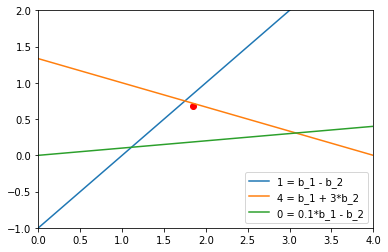

In [39]:
'''
lets form three equations equations in the form y = c_1*b_1 - c_2*b_2

1 = b_1 - b_2 

4 = b_1 + 3*b_2

0 = 0.1*b_1 - b_2

We can first see that this is overdetermined 

'''
b = np.linspace(0,5,100)

plt.plot(b, b - 1, label='1 = b_1 - b_2 ')
plt.plot(b, (4-b)/3, label='4 = b_1 + 3*b_2')
plt.plot(b, 0.1*b, label='0 = 0.1*b_1 - b_2')
plt.xlim(0,4)
plt.ylim(-1,2)
plt.legend()

# can now form into matrix

y = np.array([1,4,0])

X = np.array([
    [1, - 1],
    [1, 3],
    [0.1, -1]
])

# have the equation y = Xb -> least squares b via pinverse
b_lse = np.linalg.pinv(X) @ y

plt.scatter(b_lse[0], b_lse[1], color='r')
plt.show()

In [41]:
U, w, Vt = np.linalg.svd(X)

U, w, Vt

(array([[ 0.23159666,  0.92466839, -0.30224386],
        [-0.93025749,  0.30139213,  0.20924575],
        [ 0.28457685,  0.232704  ,  0.92998111]]),
 array([3.37417605, 1.27472976]),
 array([[-0.1986272 , -0.98007512],
        [ 0.98007512, -0.1986272 ]]))